In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from models import Model

/Users/kseniablokhina/Library/Caches/pypoetry/virtualenvs/tsf-ss25-timegpt-vRbsAJxS-py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


 See https://github.com/google-research/timesfm/blob/master/README.md for updated APIs.
Loaded PyTorch TimesFM, likely because python version is 3.10.18 (main, Jul  1 2025, 11:02:31) [Clang 17.0.0 (clang-1700.0.13.5)].


In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv('../../transformed_data/cleaned_saugeenday.csv')
df['ts'] = pd.to_datetime(df['ts'])
df.rename(columns={"series_value": "y"}, inplace=True)
print("Length of the df: ", len(df))

Length of the df:  23741


713


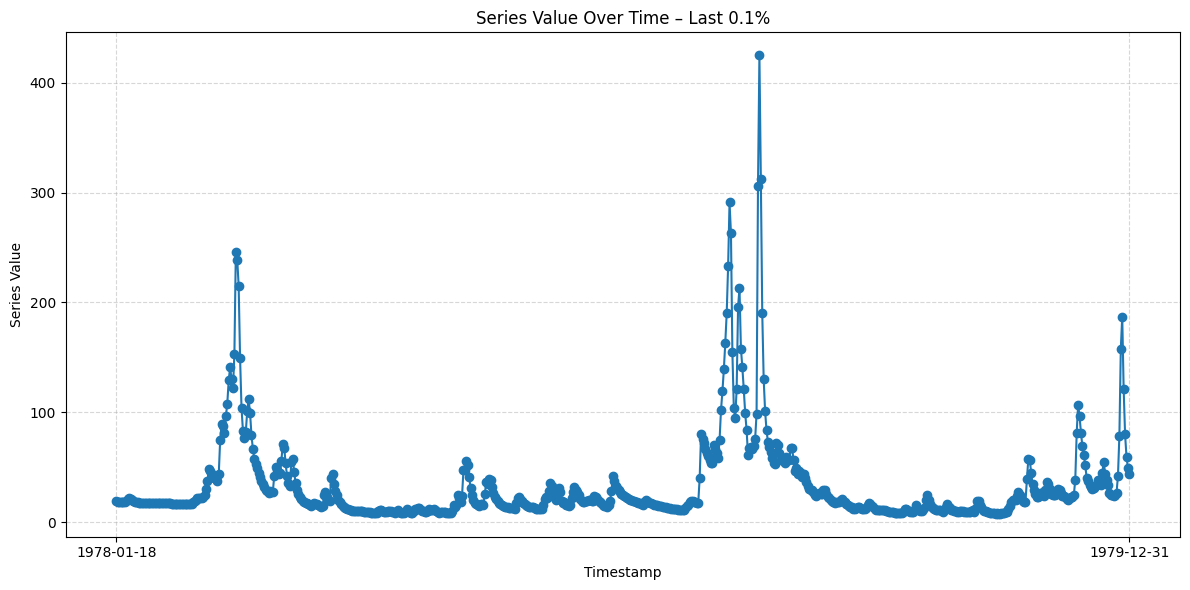

In [4]:
df_short = df[int(len(df) * 0.97):]
print(len(df_short))

start = df_short['ts'].min()
end = df_short['ts'].max()


plt.figure(figsize=(12, 6))
plt.plot(df_short['ts'], df_short['y'], marker='o')

# Start and End-Ticks
plt.xticks([start, end], [start.strftime('%Y-%m-%d'), end.strftime('%Y-%m-%d')])

plt.xlabel('Timestamp')
plt.ylabel('Series Value')
plt.title('Series Value Over Time – Last 0.1%')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [5]:
df = df.tail(1000).copy()
split_idx   = int(len(df) * 0.8)

df_train = df.iloc[:split_idx].copy().reset_index(drop=True)
df_test  = df.iloc[split_idx:].copy().reset_index(drop=True)

In [6]:
print("Duplicates:", df.duplicated().sum())
print("NaNs:\n", df.isna().sum())
print("Frequency check:", df.diff().dropna().value_counts().head())

Duplicates: 0
NaNs:
 ts    0
y     0
dtype: int64
Frequency check: ts      y   
1 days   0.0    47
        -0.5    44
        -0.3    33
        -1.0    30
        -0.2    28
Name: count, dtype: int64


In [7]:
model = Model(df=df)

# Baseline

In [10]:
baseline = model.base_line()

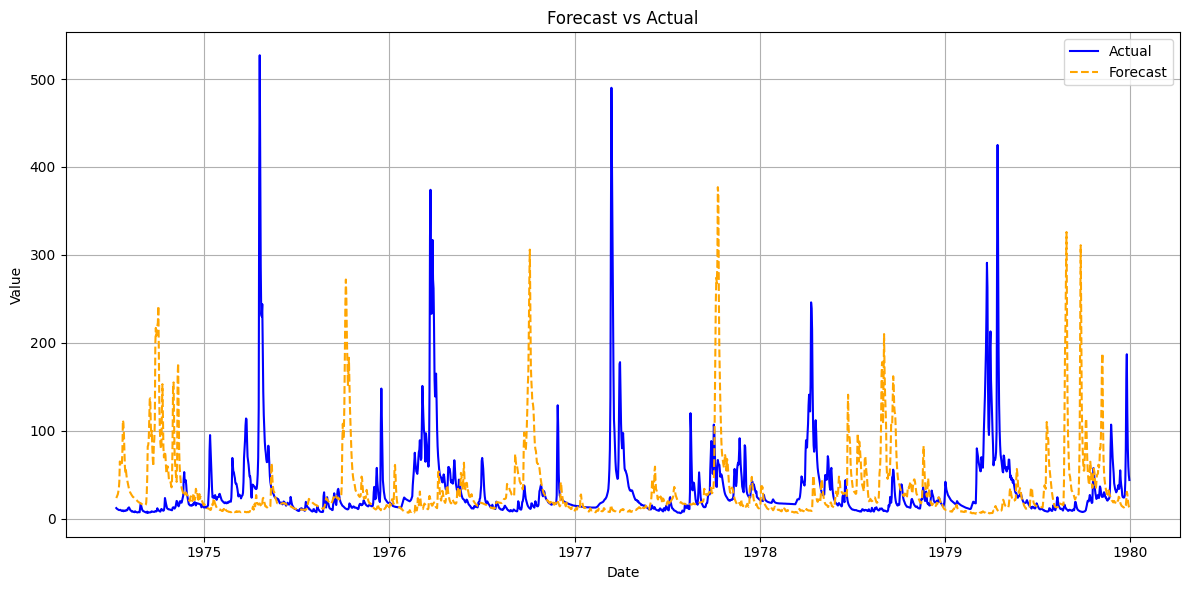

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_test['ts'], df_test['y'], label='Actual', color='blue')
plt.plot(baseline['ts'], baseline['yhat'], label='Forecast', color='orange', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Forecast vs Actual')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# LSTM

In [9]:
lstm_model = model.LSTM()

Epoch 1/50


/Users/kseniablokhina/Downloads/TSF-SS25-TimeGPT/skripts/forecasting/models.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[train_df.columns] = scaler.transform(train_df)
/Users/kseniablokhina/Downloads/TSF-SS25-TimeGPT/skripts/forecasting/models.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df[val_df.columns] = scaler.transform(val_df)
/Users/kseniablokhina/Library/Caches/pypoetry/virtualenvs/tsf-ss25-timegpt-vRbsAJxS-py3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.p

20/20 - 1s - 49ms/step - loss: 0.0156 - mae: 0.0705 - val_loss: 0.1024 - val_mae: 0.1820
Epoch 2/50
20/20 - 0s - 7ms/step - loss: 0.0124 - mae: 0.0707 - val_loss: 0.0968 - val_mae: 0.1762
Epoch 3/50
20/20 - 0s - 7ms/step - loss: 0.0122 - mae: 0.0673 - val_loss: 0.0967 - val_mae: 0.1742
Epoch 4/50
20/20 - 0s - 7ms/step - loss: 0.0118 - mae: 0.0669 - val_loss: 0.0920 - val_mae: 0.1686
Epoch 5/50
20/20 - 0s - 7ms/step - loss: 0.0115 - mae: 0.0662 - val_loss: 0.0889 - val_mae: 0.1635
Epoch 6/50
20/20 - 0s - 7ms/step - loss: 0.0111 - mae: 0.0649 - val_loss: 0.0839 - val_mae: 0.1559
Epoch 7/50
20/20 - 0s - 7ms/step - loss: 0.0106 - mae: 0.0635 - val_loss: 0.0778 - val_mae: 0.1453
Epoch 8/50
20/20 - 0s - 7ms/step - loss: 0.0100 - mae: 0.0615 - val_loss: 0.0699 - val_mae: 0.1308
Epoch 9/50
20/20 - 0s - 7ms/step - loss: 0.0093 - mae: 0.0589 - val_loss: 0.0614 - val_mae: 0.1223
Epoch 10/50
20/20 - 0s - 7ms/step - loss: 0.0085 - mae: 0.0557 - val_loss: 0.0560 - val_mae: 0.1217
Epoch 11/50
20/20 -

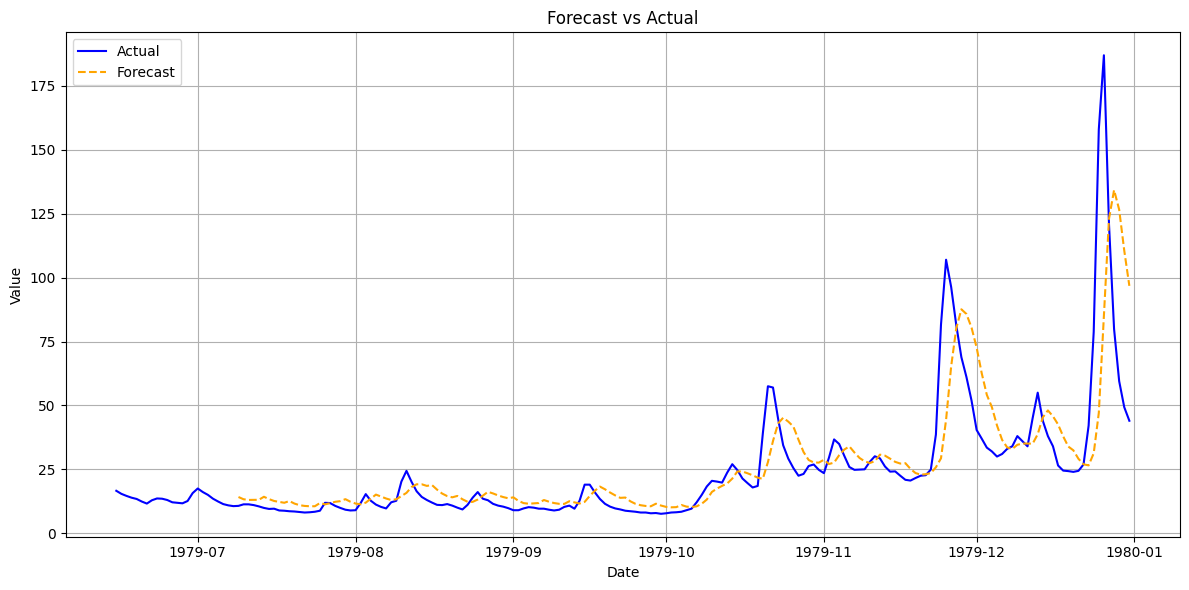

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_test['ts'], df_test['y'], label='Actual', color='blue')
plt.plot(lstm_model['ts'], lstm_model["yhat"], label='Forecast', color='orange', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Forecast vs Actual')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
lstm_mae = mean_absolute_error(df_test['y'][:-24], lstm_model["yhat"])
lstm_mae

37.77835896894419

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

df_train = convert_time_stamp(df_train.copy(), 'ts')
df_test = convert_time_stamp(df_test.copy(), 'ts')

split_index = int(len(df_train) * 0.8)
train_df = df_train.iloc[:split_index]
val_df = df_train.iloc[split_index:]

scaler = MinMaxScaler()
scaler.fit(train_df)

train_df[train_df.columns] = scaler.transform(train_df)
val_df[val_df.columns] = scaler.transform(val_df)
df_test[df_test.columns] = scaler.transform(df_test)

window = DataWindow(
    input_width=input_width,
    label_width=label_width,
    shift=shift,
    train_df=train_df,
    val_df=val_df,
    test_df=df_test,
    label_columns=["y"]
)

train_ds = window.train
val_ds = window.val
test_ds = window.test

feature_count = train_df.shape[1]

model = Sequential([
    LSTM(32, return_sequences=False, input_shape=(input_width, feature_count)),
    Dense(label_width, kernel_initializer=tf.initializers.zeros)
])

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

early_stop = EarlyStopping(patience=3, monitor='val_loss', mode='min')

model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=[early_stop],
    verbose=2
)

# TimeFM

In [8]:
timefm = model.times_fm("D")

Fetching 5 files: 100%|██████████| 5/5 [00:00<00:00, 80659.69it/s]
INFO:root:Loading checkpoint from /Users/kseniablokhina/.cache/huggingface/hub/models--google--timesfm-2.0-500m-pytorch/snapshots/dc2443792ce5516872b89b37cf1bc058c3bf0c10/torch_model.ckpt
INFO:root:Sending checkpoint to device cpu
INFO:root:Preprocessing dataframe.


Processing dataframe with multiple processes.
 See https://github.com/google-research/timesfm/blob/master/README.md for updated APIs.
Loaded PyTorch TimesFM, likely because python version is 3.10.18 (main, Jul  1 2025, 11:02:31) [Clang 17.0.0 (clang-1700.0.13.5)].
Finished preprocessing dataframe.


INFO:root:Finished creating output dataframe.


Finished forecasting.


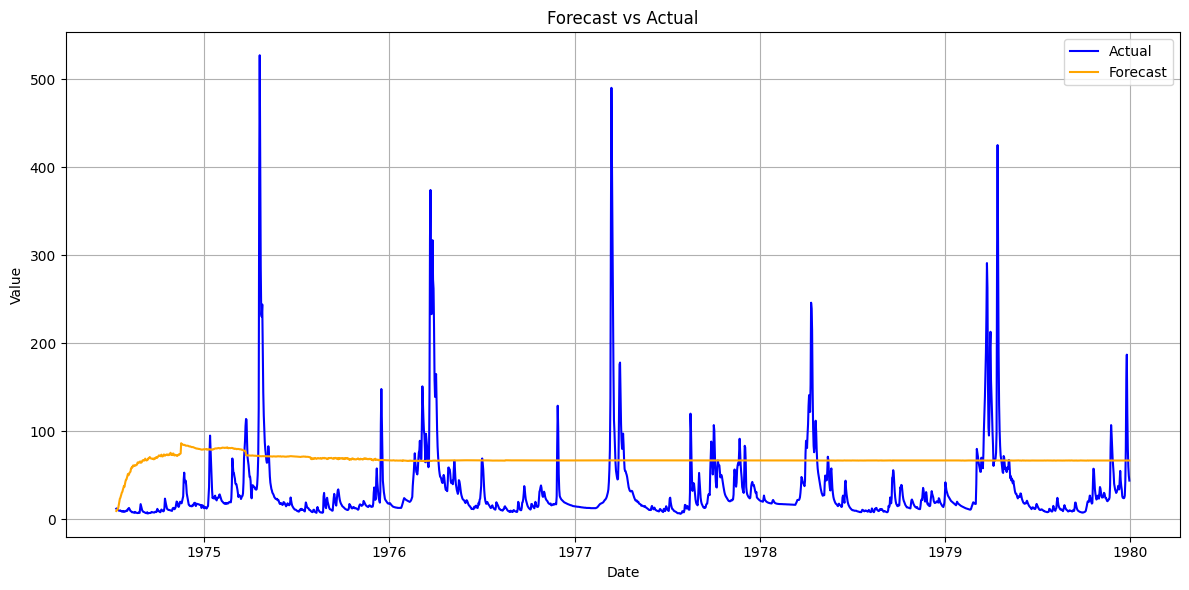

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_test['ts'], df_test['y'], label='Actual', color='blue')
plt.plot(timefm['ts'], timefm['yhat'], label='Forecast', color='orange')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Forecast vs Actual')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()